# Data exploration and preprocessing

In this notebook I first load and explore my generated instances. 

Then, I extract my features defined in the previous notebook and explore them. 

Some preprocessing steps are conducted in this notebook while other (model-specific) steps are done in the respective model notebooks.

## Contents in this notebook:
1. [Notebook setup](#setup)
2. [Explore generated instance characteristics](#instances)
3. [Explore generated instance features](#features)
4. [Split and save data](#split)
5. [Benchmark exploration](#benchmarks)

## 1. Notebook setup <a name="setup"></a>

In [2]:
# Install required packages.
# !pip install requirements.txt

# Change directory to main project folder.
import os
print(f'This folder: {os.getcwd()}')
os.chdir("..")
print(f'Project folder: {os.getcwd()}')

# Import packages.
import routing
import generation
import numpy as np
from numpy.random import default_rng
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import pickle

This folder: C:\Users\muell\thesis_main\thesis_code\notebooks - GitHub
Project folder: C:\Users\muell\thesis_main\thesis_code


## 2. Explore generated instance characteristics <a name="instances"></a>

### Load, clean, and save generated instances

Some cells are commented out since they take long to run (and require unzipping), but the rest of the notebooks works without them.

In [2]:
# # Load generated instances and store as small DataFrames for easier access later

# path = 'data/generated_final_pickle/'
# t0 = time.time()
# for folder in [
#     '00_10k_pickle/', 
#     '10_20k_pickle/', 
#     '20_30k_pickle/', 
#     '30_40k_pickle/', 
#     '40_50k_pickle/', 
#     '50_60k_pickle/', 
#     '60_70k_pickle/', 
#     '70_80k_pickle/', 
#     '80_90k_pickle/', 
#     '90_100k_pickle/', 
#     '100_103k_pickle/' # added to replace infeasible instances
# ]:
#     df = routing.load_dataset(path=path+folder, filetype='pickle', num_instances='all', info='combined', verbose=False)
#     df.to_pickle(f'data/generated_final_pickle/df_instances_small/df_instances_{folder[:6]}.pickle')
#     print(f'Saved {folder}, time elapsed: {time.time() - t0}')

Saved 00_10k_pickle/, time elapsed: 16.04479479789734
Saved 10_20k_pickle/, time elapsed: 31.286026000976562
Saved 20_30k_pickle/, time elapsed: 46.9434335231781
Saved 30_40k_pickle/, time elapsed: 62.72750782966614
Saved 40_50k_pickle/, time elapsed: 79.521169424057
Saved 50_60k_pickle/, time elapsed: 96.32778596878052
Saved 60_70k_pickle/, time elapsed: 114.5761308670044
Saved 70_80k_pickle/, time elapsed: 130.8737392425537
Saved 80_90k_pickle/, time elapsed: 148.8524956703186
Saved 90_100k_pickle/, time elapsed: 164.8252832889557
Saved 100_103k_pickle/, time elapsed: 169.06040835380554


In [3]:
# # Combine stored small DataFrames to on big DataFrame

# path = 'data/generated_final_pickle/df_instances_small/'
# df_instances = pd.concat([
#     pd.read_pickle(path+"df_instances_00_10k.pickle"), 
#     pd.read_pickle(path+"df_instances_10_20k.pickle"), 
#     pd.read_pickle(path+"df_instances_20_30k.pickle"), 
#     pd.read_pickle(path+"df_instances_30_40k.pickle"), 
#     pd.read_pickle(path+"df_instances_40_50k.pickle"), 
#     pd.read_pickle(path+"df_instances_50_60k.pickle"), 
#     pd.read_pickle(path+"df_instances_60_70k.pickle"), 
#     pd.read_pickle(path+"df_instances_70_80k.pickle"), 
#     pd.read_pickle(path+"df_instances_80_90k.pickle"), 
#     pd.read_pickle(path+"df_instances_90_100.pickle"), 
#     pd.read_pickle(path+"df_instances_100_10.pickle")
# ], ignore_index=True)
# print(df_instances.shape)
# df_instances.head()

(103000, 32)


,variant,distance_metric,depot,locations,demands,vehicle_capacities,service_times,time_windows,max_time,wait_time,...,dem_distr,cap_ratio,avg_route_size,possible_rounds,st_distr,tw_share,tw_center_distr,tw_width_distr,has_solution,num_vehicles_used
0,cvrptw,euclidean,0,"[[39.1914, 171.4928], [182.4817, 214.4226], [1...","[0, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81...","[1864, 1864, 1864, 1864, 1864, 1864, 1864, 186...","[0, 307, 278, 160, 324, 105, 174, 294, 365, 53...","[[0.0, 3707.2314], [1681.0832, 2854.1136], [18...",3707.2314,3707.2314,...,unitary,0.2645,23.0115,2.2926,uniform,0.9661,two_peaks,medium,True,7.0
1,cvrptw,euclidean,0,"[[292.573, 524.6905], [356.939, 766.0481], [42...","[0, 8, 73, 9, 3, 5, 2, 74, 4, 72, 94, 2, 2, 9,...","[456, 456, 456, 456, 456, 456, 456, 456, 456, ...","[0, 438, 438, 438, 438, 438, 438, 438, 438, 43...","[[0.0, 11556.7583], [-156.2698, 5267.3676], [-...",11556.7583,11556.7583,...,manysmall_fewlarge,0.6671,26.6840,3.5352,unitary,0.9720,uniform,uniform,True,4.0
2,cvrptw,euclidean,0,"[[61.6011, 306.8918], [88.9794, 277.9397], [15...","[0, 1, 5, 3, 1, 1, 8, 7, 5, 3, 6, 5, 1, 2, 9, ...","[215, 215, 215, 215, 215, 215, 215, 215, 215, ...","[0, 626, 635, 289, 543, 384, 325, 694, 574, 68...","[[0.0, 8238.0089], [0.0, 8238.0089], [0.0, 823...",8238.0089,8238.0089,...,lowval_highcv,0.7835,42.3090,3.2600,uniform,0.6516,discrete,long,True,3.0
3,cvrptw,euclidean,0,"[[270.0464, 196.3608], [475.2816, 286.6868], [...","[0, 7, 8, 2, 9, 1, 5, 3, 9, 4, 9, 6, 1, 1, 7, ...","[21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 2...","[0, 316, 316, 316, 316, 316, 316, 316, 316, 31...","[[0.0, 4347.8475], [0.0, 4347.8475], [543.0136...",4347.8475,4347.8475,...,lowval_highcv,0.1387,3.6062,2.3305,unitary,0.5443,two_peaks,unitary,True,9.0
4,cvrptw,euclidean,0,"[[333.8942, 266.295], [233.7259, 101.1921], [1...","[0, 4, 6, 4, 2, 8, 6, 8, 8, 3, 8, 9, 7, 4, 5, ...","[28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 2...","[0, 199, 317, 917, 109, 520, 195, 151, 878, 28...","[[0.0, 10549.1646], [6902.055, 10429.4083], [3...",10549.1646,10549.1646,...,lowval_highcv,0.1814,4.8978,4.3941,uniform,0.8922,uniform,medium,True,6.0


In [7]:
# # Memory considerations: # takes a lot of RAM like this (df_features will be lighter)
# df_instances.info()
# df_instances.info(memory_usage='deep')
# df_instances.dtypes # some columns are stored as objects instead of e.g. strings, this is memory inefficient
# # good link: https://stackoverflow.com/questions/39100971/how-do-i-release-memory-used-by-a-pandas-dataframe

In [27]:
# # Missing values (some instances could not be solved due to feasibility constraints)

# # how many instances were not solved (+ which columns)
# print(df_instances.isna().sum())

# # # which rows contain nan
# # row_has_NaN = df_instances.isna().any(axis=1)
# # rows_with_NaN = df_instances[row_has_NaN]
# # print(rows_with_NaN.shape)
# # print(np.mean(rows_with_NaN['num_customers']))

# # drop instances without solution
# df_instances.dropna(inplace=True)
# df_instances.reset_index(inplace=True, drop=True)
# df_instances.shape

variant                  0
distance_metric          0
depot                    0
locations                0
demands                  0
vehicle_capacities       0
service_times            0
time_windows             0
max_time                 0
wait_time                0
name                     0
num_vehicles             0
solution_distance     2278
solution_routes       2278
solution_times        2278
area                     0
side_ratio               0
lx                       0
ly                       0
num_customers            0
depot_pos                0
loc_distr                0
dem_distr                0
cap_ratio                0
avg_route_size           0
possible_rounds          0
st_distr                 0
tw_share                 0
tw_center_distr          0
tw_width_distr           0
has_solution             0
num_vehicles_used     2278
dtype: int64


(100722, 32)

In [28]:
# # Cap df at 100,000 samples
# df_instances = df_instances.iloc[:100000,:]
# df_instances.shape

(100000, 32)

In [29]:
# # Store df as pickle
# df_instances.to_pickle('data/generated_final_pickle/df_instances_full.pickle')

### Exploratory analysis

In [2]:
# Load df from pickle (needs to be unzipped)
df_instances = pd.read_pickle("data/generated_final_pickle/df_instances_full.pickle")

In [3]:
df_instances.shape

(100000, 32)

In [4]:
# Show columns and types

#df_instances.columns
df_instances.dtypes

variant                object
distance_metric        object
depot                   int64
locations              object
demands                object
vehicle_capacities     object
service_times          object
time_windows           object
max_time              float64
wait_time             float64
name                   object
num_vehicles            int64
solution_distance     float64
solution_routes        object
solution_times         object
area                  float64
side_ratio            float64
lx                    float64
ly                    float64
num_customers           int64
depot_pos              object
loc_distr              object
dem_distr              object
cap_ratio             float64
avg_route_size        float64
possible_rounds       float64
st_distr               object
tw_share              float64
tw_center_distr        object
tw_width_distr         object
has_solution             bool
num_vehicles_used     float64
dtype: object

In [5]:
# Describe numerical data

df_instances.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
depot,100000.0,0.000000,0.000000,0.0000,0.000000,0.00000,0.000000,0.0000
max_time,100000.0,9854.424996,5712.596413,329.4065,5447.710075,8695.24300,13259.614800,33593.1178
wait_time,100000.0,9854.424996,5712.596413,329.4065,5447.710075,8695.24300,13259.614800,33593.1178
num_vehicles,100000.0,59.404320,23.083008,20.0000,39.000000,59.00000,79.000000,99.0000
solution_distance,100000.0,7734.483451,5548.844379,184.7400,4325.367500,6627.60000,9600.392500,89192.8600
area,100000.0,504110.710418,285612.322505,10013.8174,256371.123100,505061.81810,751031.793250,999988.7242
side_ratio,100000.0,1.451989,0.451620,1.0000,1.130300,1.31270,1.625700,5.0000
lx,100000.0,687.272469,282.107666,55.4029,483.203625,685.43765,875.324250,2061.8779
ly,100000.0,687.608516,282.388748,56.7776,483.815075,685.05630,875.765775,2165.1693
num_customers,100000.0,59.404320,23.083008,20.0000,39.000000,59.00000,79.000000,99.0000


7734.483451300001


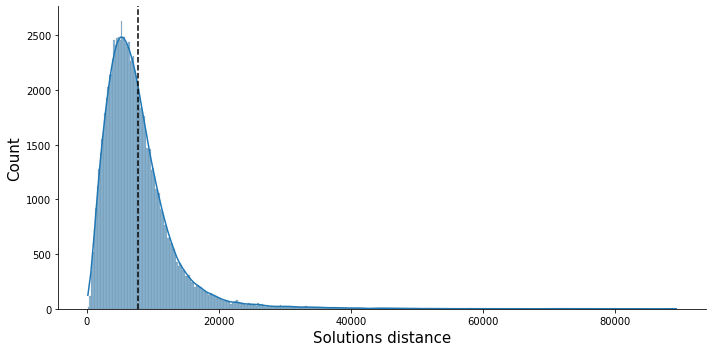

In [6]:
# Plot dependent variable

print(df_instances['solution_distance'].mean())
p = sns.displot(df_instances['solution_distance'], kde=True)
plt.gcf().set_size_inches(10, 5)
plt.axvline(x=np.mean(df_instances['solution_distance']), color='k', linestyle='--')#, color='r', linestyle='-')
plt.xlabel("Solutions distance", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.tight_layout()
#plt.savefig('dist.jpg', pad_inches=0.4, dpi=300)#, bbox_inches='tight')
plt.show()

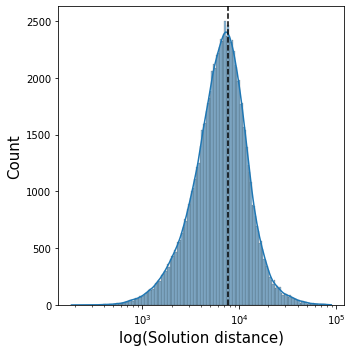

In [9]:
# show on log x axis

fig, ax = plt.subplots(1, figsize=(5,5))
          
sns.histplot(df_instances['solution_distance'], kde=True, log_scale=True)
ax.set_xlabel('log(Solution distance)', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
plt.axvline(x=np.mean(df_instances['solution_distance']), color='k', linestyle='--')#, color='r', linestyle='-')
plt.tight_layout()
# plt.savefig('distlog.eps', format='eps', pad_inches=0.4)#, bbox_inches='tight')
# plt.savefig('distlog.jpg', pad_inches=0.4)#, bbox_inches='tight')
plt.show()

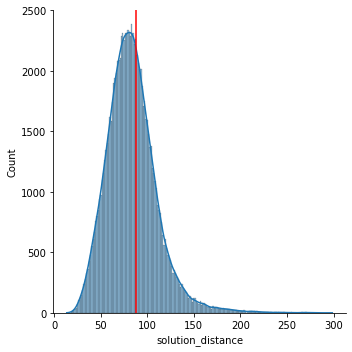

In [10]:
# alternative: show squareroot transform
sns.displot(np.sqrt(df_instances['solution_distance']), kde=True)
plt.axvline(x=np.sqrt(np.mean(df_instances['solution_distance'])), color='r', linestyle='-')
plt.show()

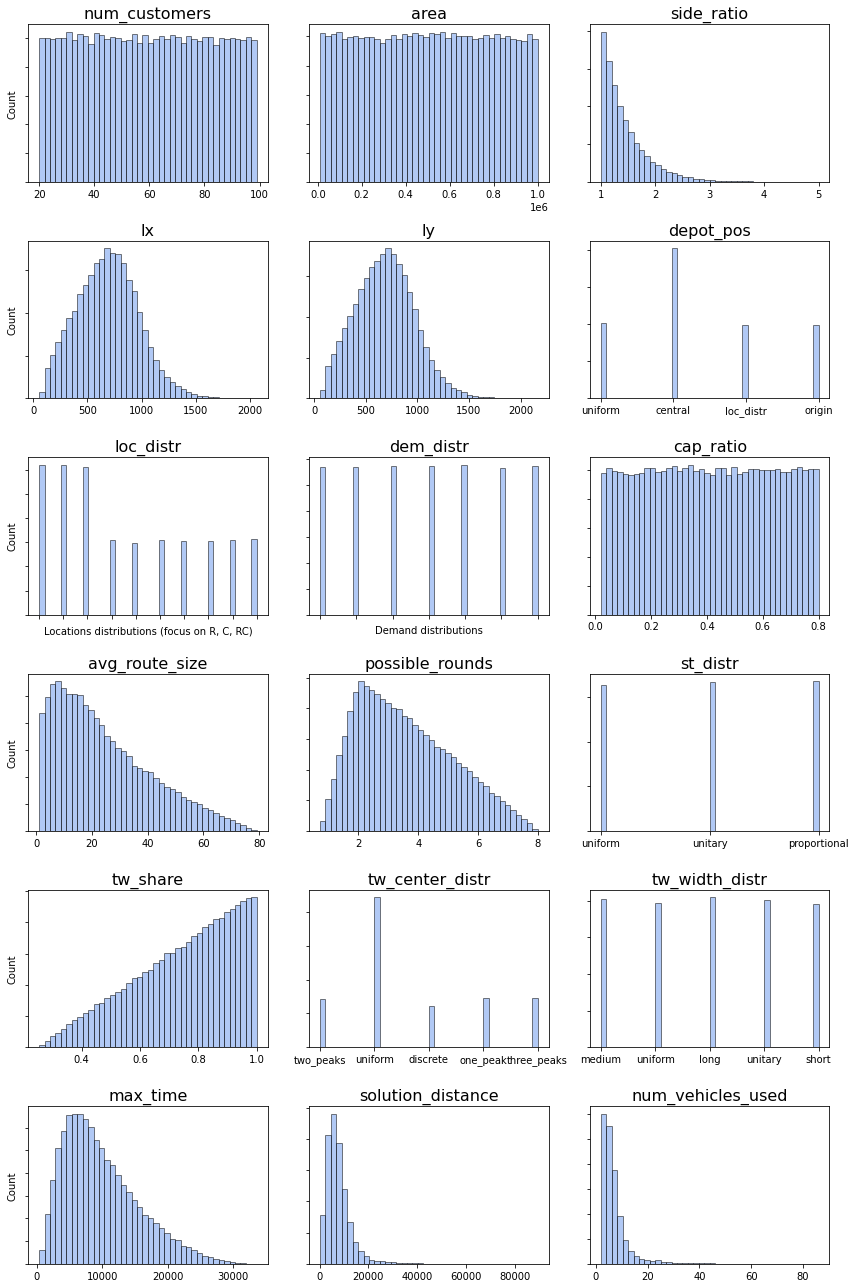

In [11]:
# Analze instance characteristics

fig, axs = plt.subplots(6,3, figsize=(12, 18), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()

#df_instances.columns
characteristics = [
    'num_customers', 
    'area', 'side_ratio', 'lx', 
    'ly', 'depot_pos', 'loc_distr', 
    'dem_distr','cap_ratio', 'avg_route_size', 
    'possible_rounds', 'st_distr','tw_share', 
    'tw_center_distr', 'tw_width_distr', 'max_time', 'solution_distance', 'num_vehicles_used'] 

for i in range(len(characteristics)): 
    axs[i].hist(df_instances[characteristics[i]], bins=40, alpha=0.5, color='cornflowerblue', ec='black', linewidth=1)
    axs[i].set_title(characteristics[i], fontdict={'fontsize': 16, 'fontweight': 'medium'})
    axs[i].set_yticklabels([])
    if i % 3 == 0:
        axs[i].set(ylabel='Count')
        
axs[6].set_xticklabels([])
axs[6].set(xlabel='Locations distributions (focus on R, C, RC)')
axs[7].set_xticklabels([])
axs[7].set(xlabel='Demand distributions')

plt.tight_layout()
#plt.savefig('instchar.jpg', pad_inches=0.4, dpi=300)#bbox_inches='tight')
plt.show()

### Selected characteristics vs distance

corr = 0.47469574861884245


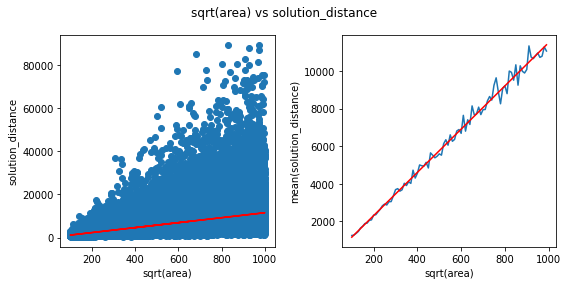

In [12]:
# sqrt(area) vs distance

print('corr =', np.sqrt(df_instances['area']).corr(df_instances['solution_distance']))

fig, axs = plt.subplots(1, 2, figsize=(8,4))
plt.suptitle('sqrt(area) vs solution_distance')

x = np.sqrt(df_instances['area'])
y = df_instances['solution_distance']
m, b = np.polyfit(x, y, 1)
axs[0].scatter(x, y)
axs[0].plot(x, m*x + b, '-', color='r')
axs[0].set(xlabel='sqrt(area)', ylabel='solution_distance')

x = np.array([i for i in range(100,1000, 10)])
y = [np.mean(df_instances.loc[abs(df_instances['area'] - i) < 1000, 'solution_distance']) for i in x**2]
#m, b = np.polyfit(x, y, 1)
axs[1].plot(x, y)
axs[1].plot(x, m*x + b, '-', color='r')
axs[1].set(xlabel='sqrt(area)', ylabel='mean(solution_distance)')

plt.tight_layout()
plt.show()

corr = 0.3062467737684437


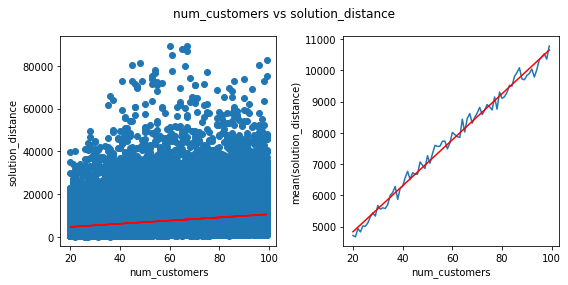

In [13]:
# num_customers vs distance

print('corr =', df_instances['num_customers'].corr(df_instances['solution_distance']))

fig, axs = plt.subplots(1, 2, figsize=(8,4))
plt.suptitle('num_customers vs solution_distance')

x = df_instances['num_customers']
y = df_instances['solution_distance']
m, b = np.polyfit(x, y, 1)
axs[0].scatter(x, y)
axs[0].plot(x, m*x + b, '-', color='r')
axs[0].set(xlabel='num_customers', ylabel='solution_distance')

x = np.array([i for i in range(20,100)])
y = [np.mean(df_instances.loc[df_instances['num_customers'] == i, 'solution_distance']) for i in x]
#m, b = np.polyfit(x, y, 1)
axs[1].plot(x, y)
axs[1].plot(x, m*x + b, '-', color='r')
axs[1].set(xlabel='num_customers', ylabel='mean(solution_distance)')

plt.tight_layout()
plt.show()

cap_ratio = -0.31757612088615433


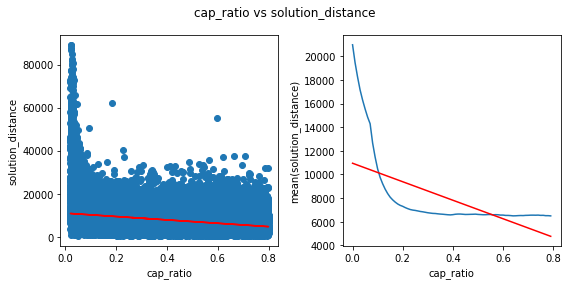

In [14]:
# cap_ratio vs distance

print('cap_ratio =', df_instances['cap_ratio'].corr(df_instances['solution_distance']))

fig, axs = plt.subplots(1, 2, figsize=(8,4))
plt.suptitle('cap_ratio vs solution_distance')

x = df_instances['cap_ratio']
y = df_instances['solution_distance']
m, b = np.polyfit(x, y, 1)
axs[0].scatter(x, y)
axs[0].plot(x, m*x + b, '-', color='r')
axs[0].set(xlabel='cap_ratio', ylabel='solution_distance')

x = np.array([i for i in range(0, 80, 1)]) / 100
y = [np.mean(df_instances.loc[abs(df_instances['cap_ratio'] - i) < 0.05, 'solution_distance']) for i in x]
#m, b = np.polyfit(x, y, 1)
axs[1].plot(x, y)
axs[1].plot(x, m*x + b, '-', color='r')
axs[1].set(xlabel='cap_ratio', ylabel='mean(solution_distance)')

plt.tight_layout()
plt.show()

tw_share = 0.05753128898883494


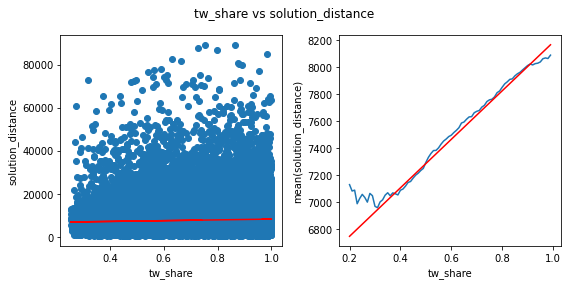

In [15]:
# tw_share vs distance

print('tw_share =', df_instances['tw_share'].corr(df_instances['solution_distance']))

fig, axs = plt.subplots(1, 2, figsize=(8,4))
plt.suptitle('tw_share vs solution_distance')

x = df_instances['tw_share']
y = df_instances['solution_distance']
m, b = np.polyfit(x, y, 1)
axs[0].scatter(x, y)
axs[0].plot(x, m*x + b, '-', color='r')
axs[0].set(xlabel='tw_share', ylabel='solution_distance')

x = np.array([i for i in range(20, 100, 1)]) / 100
y = [np.mean(df_instances.loc[abs(df_instances['tw_share'] - i) < 0.1, 'solution_distance']) for i in x]
#m, b = np.polyfit(x, y, 1)
axs[1].plot(x, y)
axs[1].plot(x, m*x + b, '-', color='r')
axs[1].set(xlabel='tw_share', ylabel='mean(solution_distance)')

plt.tight_layout()
plt.show()

### Check extreme distances

#### Check min distance

In [16]:
# Analyze the instances with smallest distance

df_instances[df_instances['solution_distance'] == min(df_instances['solution_distance'])]

,variant,distance_metric,depot,locations,demands,vehicle_capacities,service_times,time_windows,max_time,wait_time,...,dem_distr,cap_ratio,avg_route_size,possible_rounds,st_distr,tw_share,tw_center_distr,tw_width_distr,has_solution,num_vehicles_used
27589,cvrptw,euclidean,0,"[[69.2579, 52.0087], [45.7102, 46.8078], [90.0...","[0, 56, 6, 52, 27, 13, 3, 32, 1, 30, 49, 9, 43...","[381, 381, 381, 381, 381, 381, 381, 381, 381, ...","[0, 17, 1, 16, 8, 4, 0, 10, 0, 9, 15, 2, 13, 3...","[[0.0, 625.1538], [0.0, 625.1538], [229.0725, ...",625.1538,625.1538,...,quadrant,0.4754,10.4588,1.2888,proportional,0.4695,one_peak,medium,True,3.0


In [17]:
instance_dict = df_instances.loc[27589,:]
instance_dict

variant                                                          cvrptw
distance_metric                                               euclidean
depot                                                                 0
locations             [[69.2579, 52.0087], [45.7102, 46.8078], [90.0...
demands               [0, 56, 6, 52, 27, 13, 3, 32, 1, 30, 49, 9, 43...
vehicle_capacities    [381, 381, 381, 381, 381, 381, 381, 381, 381, ...
service_times         [0, 17, 1, 16, 8, 4, 0, 10, 0, 9, 15, 2, 13, 3...
time_windows          [[0.0, 625.1538], [0.0, 625.1538], [229.0725, ...
max_time                                                       625.1538
wait_time                                                      625.1538
name                                                       cvrptw028208
num_vehicles                                                         22
solution_distance                                                184.74
solution_routes       [[0, 0], [0, 9, 13, 22, 4, 16, 10, 2, 19, 

In [18]:
instance = routing.routingInstance.fromdict(instance_dict)
#instance.compute_distance_matrix() # error
distance_matrix = np.linalg.norm(instance.locations[:, None, :] - instance.locations[None, :, :], axis=-1)
instance.distance_matrix = distance_matrix
routing.print_solution(instance, verbose=2)

Solution distance: 184.74 (vehicles used: 3)

Route for vehicle 1 (distance=80.97, load=353, time=270.92):
 0 (d0,l0,t0) -> 9 (d12,l30,t12) -> 13 (d17,l127,t26) -> 22 (d22,l164,t138) -> 4 (d24,l191,t151) -> 16 (d39,l235,t174) -> 10 (d48,l284,t196) -> 2 (d54,l290,t229) -> 19 (d58,l328,t234) -> 11 (d67,l337,t255) -> 18 (d70,l353,t260) -> 0 (d80,l353,t270)

Route for vehicle 2 (distance=76.93, load=258, time=407.82):
 0 (d0,l0,t0) -> 20 (d16,l32,t16) -> 15 (d19,l68,t29) -> 1 (d27,l124,t48) -> 14 (d32,l206,t89) -> 5 (d45,l219,t132) -> 8 (d54,l220,t188) -> 7 (d58,l252,t192) -> 17 (d61,l255,t205) -> 6 (d65,l258,t396) -> 0 (d76,l258,t407)

Route for vehicle 21 (distance=26.87, load=189, time=393.29):
 0 (d0,l0,t0) -> 12 (d8,l43,t345) -> 3 (d16,l95,t367) -> 21 (d20,l189,t387) -> 0 (d26,l189,t393)



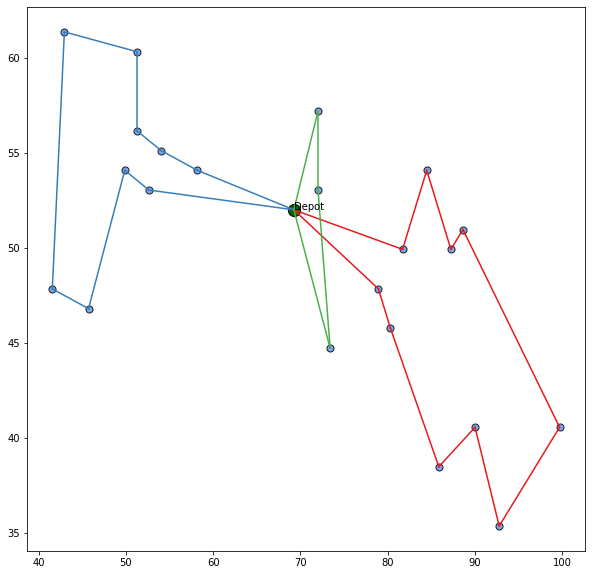

In [19]:
instance.plot(solved=True, fig_size=(10,10))

#### Check max distance

In [20]:
# Analyze the instances with longest distance

df_instances[df_instances['solution_distance'] == max(df_instances['solution_distance'])]

,variant,distance_metric,depot,locations,demands,vehicle_capacities,service_times,time_windows,max_time,wait_time,...,dem_distr,cap_ratio,avg_route_size,possible_rounds,st_distr,tw_share,tw_center_distr,tw_width_distr,has_solution,num_vehicles_used
43494,cvrptw,euclidean,0,"[[73.9795, 267.4812], [676.1691, 635.315], [88...","[0, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58...","[90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 9...","[0, 1275, 1275, 1275, 1275, 1275, 1275, 1275, ...","[[0.0, 16246.2317], [0.0, 16246.2317], [0.0, 1...",16246.2317,16246.2317,...,unitary,0.0231,1.5477,4.8803,unitary,0.7518,uniform,long,True,67.0


In [21]:
instance_dict = df_instances.loc[43494,:]
instance_dict

variant                                                          cvrptw
distance_metric                                               euclidean
depot                                                                 0
locations             [[73.9795, 267.4812], [676.1691, 635.315], [88...
demands               [0, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58...
vehicle_capacities    [90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 9...
service_times         [0, 1275, 1275, 1275, 1275, 1275, 1275, 1275, ...
time_windows          [[0.0, 16246.2317], [0.0, 16246.2317], [0.0, 1...
max_time                                                     16246.2317
wait_time                                                    16246.2317
name                                                       cvrptw044467
num_vehicles                                                         67
solution_distance                                              89192.86
solution_routes       [[0, 64, 0], [0, 63, 0], [0, 65, 0], [0, 5

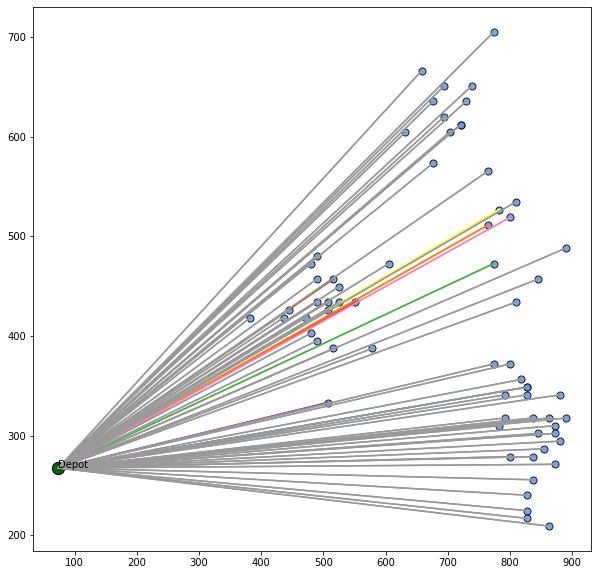

In [22]:
instance = routing.routingInstance.fromdict(instance_dict)
instance.plot(solved=True, fig_size=(10,10))

## 3. Explore generated instance features <a name="features"></a>

### Extract, clean, and save features

Some cells are commented out since they take long to run (and require unzipping), but the rest of the notebooks works without them.

In [2]:
# # Load generated instances and store as small DataFrames for easier access later

# path = 'data/generated_final_pickle/'
# t0 = time.time()
# for folder in [
#     '00_10k_pickle/', 
#     '10_20k_pickle/', 
#     '20_30k_pickle/', 
#     '30_40k_pickle/', 
#     '40_50k_pickle/', 
#     '50_60k_pickle/', 
#     '60_70k_pickle/', 
#     '70_80k_pickle/', 
#     '80_90k_pickle/', 
#     '90_100k_pickle/', 
#     '100_103k_pickle/' # added to replace infeasible instances
# ]:
#     df = generation.extract_features_dataset(path=path+folder, filetype='pickle', num_instances='all', verbose=False)
#     df.to_pickle(f'data/generated_final_pickle/df_features_small/df_features_{folder[:6]}.pickle')
#     print(f'Saved {folder}, time elapsed: {time.time() - t0}')

Saved 00_10k_pickle/, time elapsed: 117.25986957550049
Saved 10_20k_pickle/, time elapsed: 236.17545199394226
Saved 20_30k_pickle/, time elapsed: 355.9710636138916
Saved 30_40k_pickle/, time elapsed: 473.23442554473877
Saved 40_50k_pickle/, time elapsed: 588.0359306335449
Saved 50_60k_pickle/, time elapsed: 708.4720211029053
Saved 60_70k_pickle/, time elapsed: 826.9406383037567
Saved 70_80k_pickle/, time elapsed: 940.5330862998962
Saved 80_90k_pickle/, time elapsed: 1061.5315284729004
Saved 90_100k_pickle/, time elapsed: 1181.6928906440735
Saved 100_103k_pickle/, time elapsed: 1217.5821557044983


In [ ]:
# # Load generated instances and store as small DataFrames for easier access later

# path = 'data/generated_final_pickle/00_10k_pickle/'
# t0 = time.time()

#     df = generation.extract_features_dataset(path=path+folder, filetype='pickle', num_instances='all', verbose=False)
#     df.to_pickle(f'data/generated_final_pickle/df_features_small/df_features_{folder[:6]}.pickle')
#     print(f'Saved {folder}, time elapsed: {time.time() - t0}')

In [3]:
# # Combine stored small DataFrames to on big DataFrame

# path = 'data/generated_final_pickle/df_features_small/'
# df_features = pd.concat([
#     pd.read_pickle(path+"df_features_00_10k.pickle"), 
#     pd.read_pickle(path+"df_features_10_20k.pickle"), 
#     pd.read_pickle(path+"df_features_20_30k.pickle"), 
#     pd.read_pickle(path+"df_features_30_40k.pickle"), 
#     pd.read_pickle(path+"df_features_40_50k.pickle"), 
#     pd.read_pickle(path+"df_features_50_60k.pickle"), 
#     pd.read_pickle(path+"df_features_60_70k.pickle"), 
#     pd.read_pickle(path+"df_features_70_80k.pickle"), 
#     pd.read_pickle(path+"df_features_80_90k.pickle"), 
#     pd.read_pickle(path+"df_features_90_100.pickle"), 
#     pd.read_pickle(path+"df_features_100_10.pickle")
# ], ignore_index=True)
# print(df_features.shape)
# df_features.head()

(103000, 47)


,name,NumCust,AreaRoot,Perimeter,SideRatio,CentDepot,CentCustAvg,CentCustStd,Dispersion,AvgFurthest,...,TwWidthStd,TwWidthMin,TwWidthMed,TwWidthMax,TwCentAvg,TwCentStd,TwCentMin,TwCentMed,TwCentMax,distance
0,cvrptw000001,87.0,194.097088,841.053522,2.004982,1.056720,0.353615,0.152160,0.278559,1.232398,...,0.113518,0.210963,0.303928,1.0,0.481424,0.224723,0.047424,0.520124,0.852363,4186.06
1,cvrptw000002,40.0,606.043396,2442.166442,1.677912,0.158490,0.394828,0.189802,0.299522,1.191150,...,0.220426,0.002770,0.327138,1.0,0.490797,0.249927,0.052658,0.545408,0.860990,5541.74
2,cvrptw000003,54.0,292.891406,1414.220888,4.038393,0.893092,0.841836,0.174356,0.549225,1.926687,...,0.246301,0.406355,0.522353,1.0,0.509259,0.198157,0.250000,0.500000,0.750000,3245.78
3,cvrptw000004,26.0,420.893116,1665.769835,1.445222,0.078360,0.449797,0.202992,0.332603,1.134282,...,0.460015,0.077236,0.077236,1.0,0.487015,0.167206,0.163511,0.500000,0.812363,4207.86
4,cvrptw000005,27.0,380.323348,1451.489975,1.414407,0.359132,0.373817,0.193810,0.296202,1.052940,...,0.137207,0.242605,0.295159,1.0,0.564780,0.239676,0.090060,0.585971,0.900867,3796.94


In [ ]:
# # Memory considerations:
# df_features.info()
# df_features.info(memory_usage='deep')
# df_features.dtypes # some columns are stored as objects instead of e.g. strings, this is memory inefficient
# # good link: https://stackoverflow.com/questions/39100971/how-do-i-release-memory-used-by-a-pandas-dataframe

In [4]:
# # Missing values (some instances could not be solved due to feasibility constraints)

# # how many instances were not solved (+ which columns)
# print(df_features.isna().sum())

# # # which rows contain nan
# # row_has_NaN = df_features.isna().any(axis=1)
# # rows_with_NaN = df_features[row_has_NaN]
# # print(rows_with_NaN.shape)
# # print(np.mean(rows_with_NaN['num_customers']))

# # drop instances without solution
# df_features.dropna(inplace=True)
# df_features.reset_index(inplace=True, drop=True)
# df_features.shape

name               0
NumCust            0
AreaRoot           0
Perimeter          0
SideRatio          0
CentDepot          0
CentCustAvg        0
CentCustStd        0
Dispersion         0
AvgFurthest        0
AvgNearest         0
DepCustAvg         0
DepCustStd         0
DepCustMin         0
DepCustMed         0
DepCustMax         0
IntCustLinks       0
IntCustAvg         0
IntCustStd         0
IntCustMin         0
IntCustMed         0
IntCustMax         0
CapRatio           0
NumVehMin          0
DemAvg             0
DemStd             0
DemMin             0
DemMed             0
DemMax             0
PossRounds         0
StAvg              0
StStd              0
StMin              0
StMed              0
StMax              0
TwShare            0
TwWidthAvg         0
TwWidthStd         0
TwWidthMin         0
TwWidthMed         0
TwWidthMax         0
TwCentAvg          0
TwCentStd          0
TwCentMin          0
TwCentMed          0
TwCentMax          0
distance        2278
dtype: int64


(100722, 47)

In [5]:
# # Cap df at 100,000 samples
# df_features = df_features.iloc[:100000,:]
# df_features.shape

(100000, 47)

In [6]:
# # Store df as pickle
# df_features.to_pickle('data/generated_final_pickle/df_features_full.pickle')

### Exploratory analysis

In [4]:
# Load df from pickle
df_features = pd.read_pickle('data/generated_final_pickle/df_features_train.pickle')

In [5]:
df_features.shape

(80000, 44)

In [6]:
# Show columns and types

#df_features.columns
df_features.dtypes

NumCust         float64
AreaRoot        float64
Perimeter       float64
SideRatio       float64
CentDepot       float64
CentCustAvg     float64
CentCustStd     float64
Dispersion      float64
AvgFurthest     float64
AvgNearest      float64
DepCustAvg      float64
DepCustStd      float64
DepCustMin      float64
DepCustMed      float64
DepCustMax      float64
IntCustLinks    float64
IntCustAvg      float64
IntCustStd      float64
IntCustMin      float64
IntCustMed      float64
IntCustMax      float64
CapRatio        float64
NumVehMin       float64
DemAvg          float64
DemStd          float64
DemMin          float64
DemMed          float64
DemMax          float64
PossRounds      float64
StAvg           float64
StStd           float64
StMin           float64
StMed           float64
StMax           float64
TwShare         float64
TwWidthAvg      float64
TwWidthStd      float64
TwWidthMin      float64
TwWidthMed      float64
TwCentAvg       float64
TwCentStd       float64
TwCentMin       

In [7]:
# Describe numerical data

df_features.describe().transpose().head(50)

,count,mean,std,min,25%,50%,75%,max
NumCust,80000.0,59.480213,23.086730,2.000000e+01,3.900000e+01,59.000000,79.000000,99.000000
AreaRoot,80000.0,541.764087,207.158886,2.788718e+01,3.848685e+02,558.945382,705.022938,982.637757
Perimeter,80000.0,2164.217784,813.201146,1.376356e+02,1.557619e+03,2232.010287,2797.210246,4610.638222
SideRatio,80000.0,1.621845,0.749623,1.000000e+00,1.171442e+00,1.405185,1.812022,20.157298
CentDepot,80000.0,0.436089,0.344093,6.640309e-04,1.388956e-01,0.365827,0.698086,3.720463
CentCustAvg,80000.0,0.448430,0.096937,1.874365e-01,3.913115e-01,0.428118,0.485026,1.948814
CentCustStd,80000.0,0.178600,0.042534,4.065975e-02,1.543172e-01,0.171588,0.195044,0.754859
Dispersion,80000.0,0.322260,0.049962,2.220139e-01,2.937779e-01,0.312489,0.339897,1.230886
AvgFurthest,80000.0,1.201844,0.210983,9.147707e-01,1.082864e+00,1.146155,1.242776,4.194841
AvgNearest,80000.0,0.076551,0.026703,1.949994e-02,5.794789e-02,0.069290,0.090120,0.228016


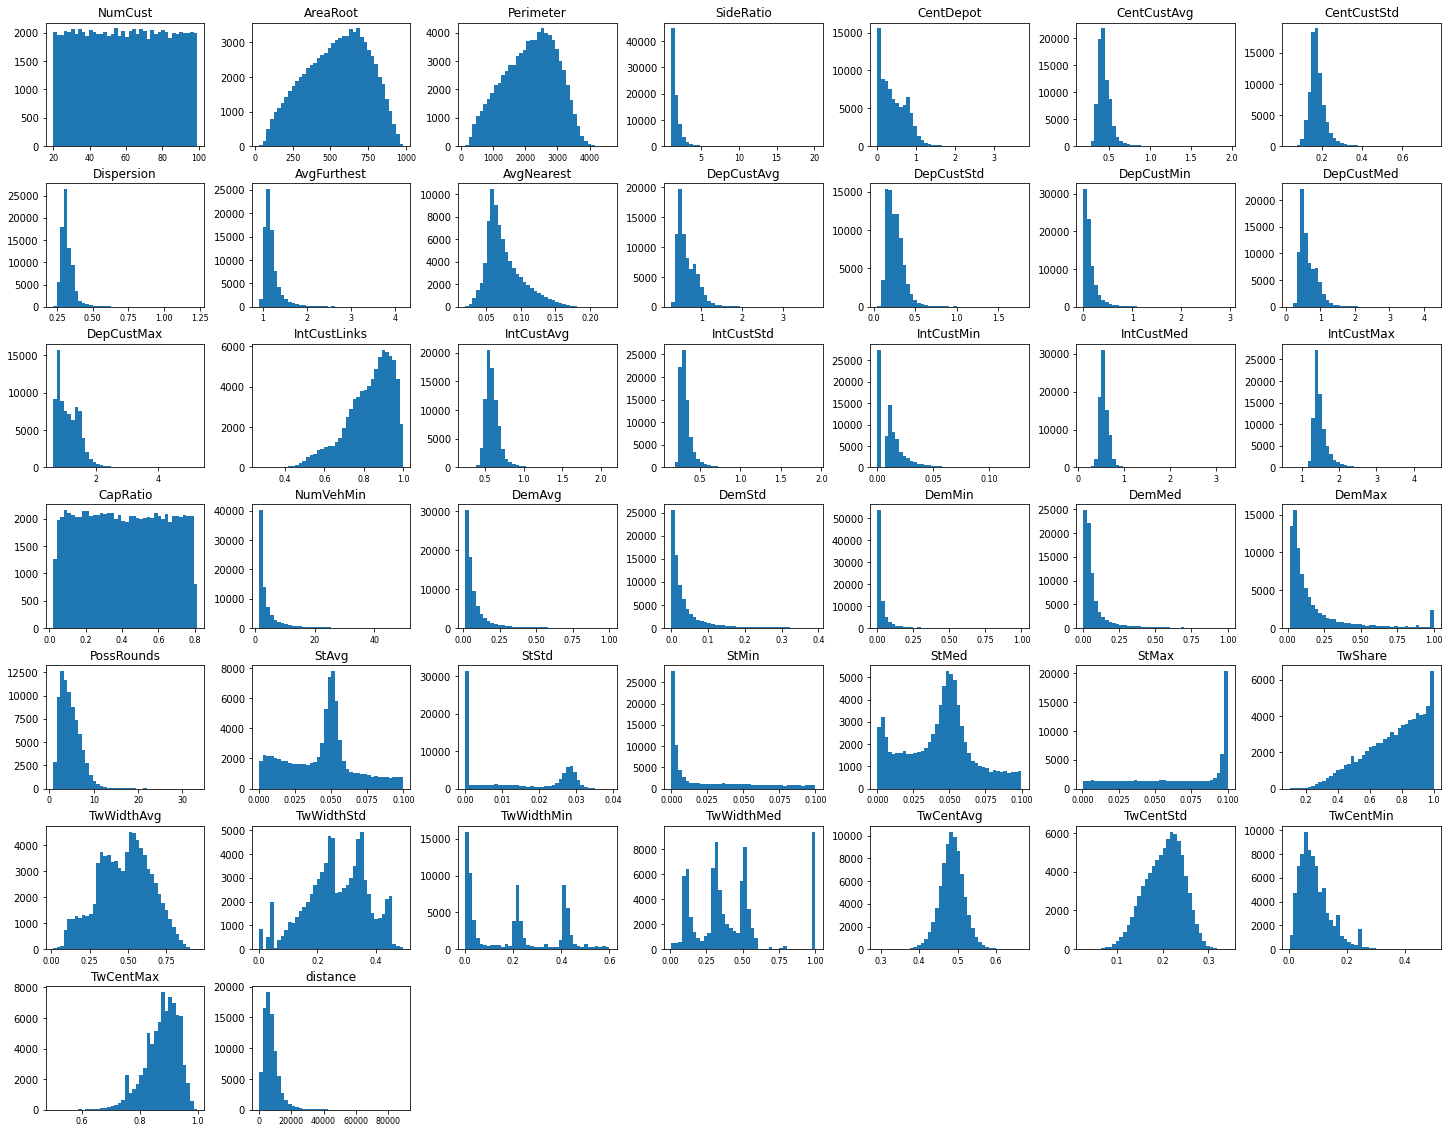

In [10]:
### Analyze and plot features

#df_num = df_features.select_dtypes(include = ['float64', 'int64'])
df_features.hist(figsize=(25, 20), bins=40, xlabelsize=8, ylabelsize=None, grid=False); # ; avoid having the matplotlib verbose informations

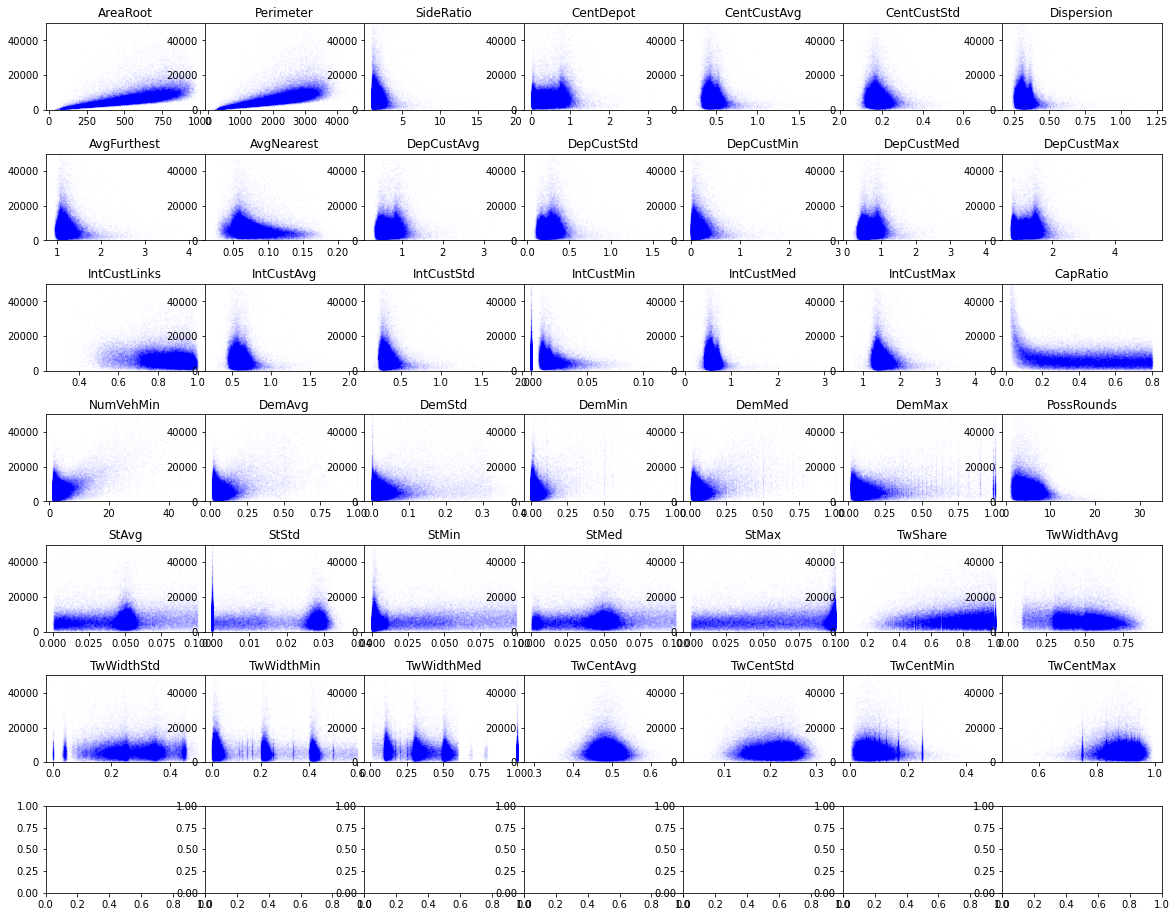

In [11]:
### Individual features vs distance

fig, axs = plt.subplots(7,7, figsize=(20, 16), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)

axs = axs.ravel()

count = 0

for i, c in enumerate(df_features.columns[1:-1]):
    
    axs[i].set_ylim((0,50000))
    axs[i].scatter(df_features[c], df_features['distance'], s=1, alpha=0.01, c='blue')
    axs[i].set_title(c)
        
#fig.tight_layout()
plt.show()

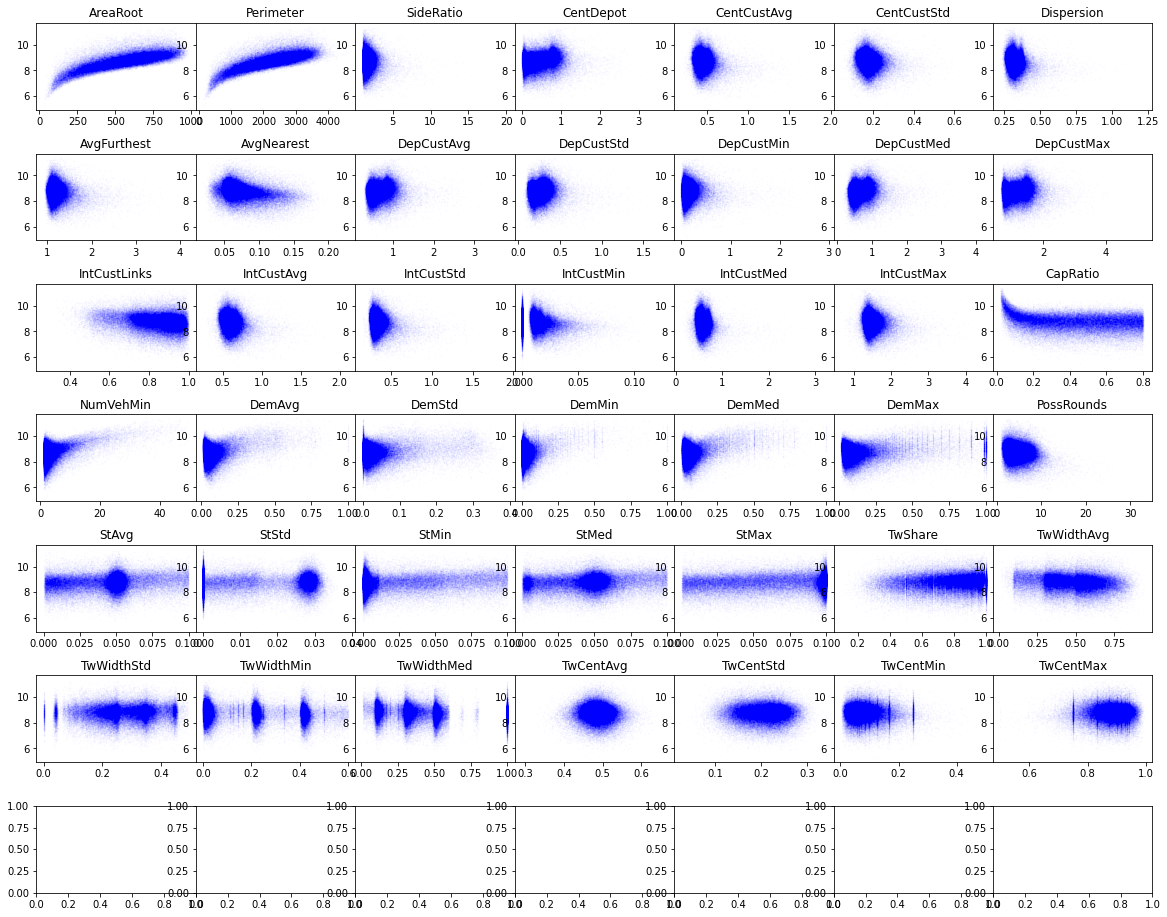

In [12]:
### log transformed

fig, axs = plt.subplots(7,7, figsize=(20, 16), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)

axs = axs.ravel()

count = 0

for i, c in enumerate(df_features.columns[1:-1]):
    
    axs[i].scatter(df_features[c], np.log(np.array(df_features['distance'])), s=1, alpha=0.01, c='blue')
    axs[i].set_title(c)
        
#fig.tight_layout()
plt.show()

In [13]:
### Individual feature correlation with distance

df_corr = df_features.corr()['distance'][:-1] # -1 because the last column is distance
golden_features_list = df_corr[abs(df_corr) > 0.1].sort_values(ascending=False)
print("There is {} strongly correlated values with distance:\n{}".format(len(golden_features_list), golden_features_list))

There is 30 strongly correlated values with distance:
NumVehMin       0.603908
Perimeter       0.563216
AreaRoot        0.560047
DemMed          0.430159
DemAvg          0.428158
DemMin          0.342451
NumCust         0.305747
DemMax          0.298016
DemStd          0.199607
CentDepot       0.164756
StAvg           0.129843
StMed           0.129671
DepCustMed      0.125436
DepCustAvg      0.122660
DepCustMax      0.120262
TwWidthMin     -0.100862
TwWidthMed     -0.100996
CentCustAvg    -0.104409
IntCustMed     -0.105656
IntCustMax     -0.115327
CentCustStd    -0.116400
TwWidthAvg     -0.121131
IntCustStd     -0.121601
Dispersion     -0.122763
IntCustAvg     -0.135722
IntCustLinks   -0.139367
PossRounds     -0.140585
IntCustMin     -0.159910
AvgNearest     -0.241365
CapRatio       -0.321562
Name: distance, dtype: float64


### Selected features with distance

TwWidthAvg = -0.12113067211239975


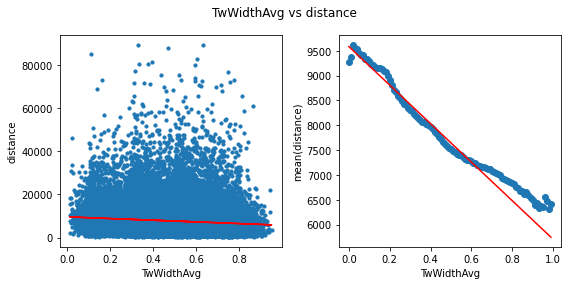

In [14]:
# TwWidthAvg vs distance

print('TwWidthAvg =', df_features['TwWidthAvg'].corr(df_features['distance']))

fig, axs = plt.subplots(1, 2, figsize=(8,4))
plt.suptitle('TwWidthAvg vs distance')

x = df_features['TwWidthAvg']
y = df_features['distance']
m, b = np.polyfit(x, y, 1)
axs[0].scatter(x, y, s=10, alpha=1.0)
axs[0].plot(x, m*x + b, '-', color='r')
axs[0].set(xlabel='TwWidthAvg', ylabel='distance')

x = np.array([i for i in range(0, 100, 1)]) / 100
y = [np.mean(df_features.loc[abs(df_features['TwWidthAvg'] - i) < 0.1, 'distance']) for i in x]
#m, b = np.polyfit(x, y, 1)
axs[1].scatter(x, y)
axs[1].plot(x, m*x + b, '-', color='r')
axs[1].set(xlabel='TwWidthAvg', ylabel='mean(distance)')

plt.tight_layout()
plt.show()

NumVehMin = 0.6039079732588072


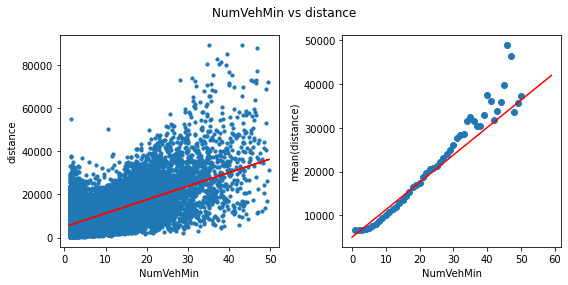

In [15]:
# NumVehMin vs distance

print('NumVehMin =', df_features['NumVehMin'].corr(df_features['distance']))

fig, axs = plt.subplots(1, 2, figsize=(8,4))
plt.suptitle('NumVehMin vs distance')

x = df_features['NumVehMin']
y = df_features['distance']
m, b = np.polyfit(x, y, 1)
axs[0].scatter(x, y, s=10, alpha=1.0)
axs[0].plot(x, m*x + b, '-', color='r')
axs[0].set(xlabel='NumVehMin', ylabel='distance')

x = np.array([i for i in range(0, 60, 1)])
y = [np.mean(df_features.loc[abs(df_features['NumVehMin'] - i) < 1, 'distance']) for i in x]
#m, b = np.polyfit(x, y, 1)
axs[1].scatter(x, y)
axs[1].plot(x, m*x + b, '-', color='r')
axs[1].set(xlabel='NumVehMin', ylabel='mean(distance)')

plt.tight_layout()
plt.show()

SideRatio = -0.050448221164269974


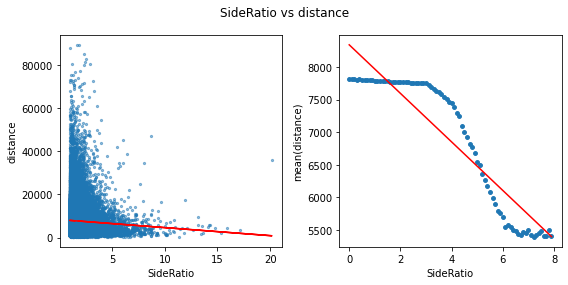

In [16]:
# SideRatio vs distance

print('SideRatio =', df_features['SideRatio'].corr(df_features['distance']))

fig, axs = plt.subplots(1, 2, figsize=(8,4))
plt.suptitle('SideRatio vs distance')

x = df_features['SideRatio']
y = df_features['distance']
m, b = np.polyfit(x, y, 1)
axs[0].scatter(x, y, s=5, alpha=0.5)
axs[0].plot(x, m*x + b, '-', color='r')
axs[0].set(xlabel='SideRatio', ylabel='distance')

x = np.array([i for i in range(0, 80, 1)]) / 10
y = [np.mean(df_features.loc[abs(df_features['SideRatio'] - i) < 2, 'distance']) for i in x]
#m, b = np.polyfit(x, y, 1)
axs[1].scatter(x, y, s=15)
axs[1].plot(x, m*x + b, '-', color='r')
axs[1].set(xlabel='SideRatio', ylabel='mean(distance)')

plt.tight_layout()
plt.show()

Dispersion = -0.12276273956064429


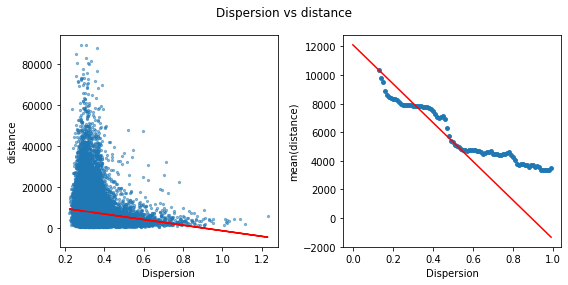

In [17]:
# Dispersion vs distance

print('Dispersion =', df_features['Dispersion'].corr(df_features['distance']))

fig, axs = plt.subplots(1, 2, figsize=(8,4))
plt.suptitle('Dispersion vs distance')

x = df_features['Dispersion']
y = df_features['distance']
m, b = np.polyfit(x, y, 1)
axs[0].scatter(x, y, s=5, alpha=0.5)
axs[0].plot(x, m*x + b, '-', color='r')
axs[0].set(xlabel='Dispersion', ylabel='distance')

x = np.array([i for i in range(0, 100, 1)]) / 100
y = [np.mean(df_features.loc[abs(df_features['Dispersion'] - i) < 0.1, 'distance']) for i in x]
#m, b = np.polyfit(x, y, 1)
axs[1].scatter(x, y, s=15)
axs[1].plot(x, m*x + b, '-', color='r')
axs[1].set(xlabel='Dispersion', ylabel='mean(distance)')

plt.tight_layout()
plt.show()

## 4. Split and save data <a name="split"></a>

Commented out since it requires long time and unzipping. However, the out put can already be found in data folder.

In [2]:
# # Load instance data
# df_instances = pd.read_pickle("data/generated_final_pickle/df_instances_full.pickle")
# df_instances.shape

(100000, 32)

In [4]:
# # Load feature data
# df_features = pd.read_pickle('data/generated_final_pickle/df_features_full.pickle')
# df_features.shape

(100000, 47)

In [6]:
# # drop useless features
# df_features = df_features.drop('name', axis=1)
# df_features = df_features.drop('TwWidthMax', axis=1)
# df_features = df_features.drop('TwCentMed', axis=1)
# df_features.shape

(100000, 44)

In [8]:
# # create random index permutation so we can split instances and features in the same way
# # shuffling is not strictly necessary since the generated data is independent of each other
# # we do it anyway since it is good practice

# rng = default_rng(42)
# idx = rng.permutation(df_instances.index)
# with open('data/generated_final_pickle/shuffling_index.pickle', 'wb') as f:
#     pickle.dump(idx, f)

In [9]:
# with open('data/generated_final_pickle/shuffling_index.pickle', 'rb') as f:
#     idx = pickle.load(f)

In [10]:
# df_instances = df_instances.reindex(idx)
# df_instances.head()

,variant,distance_metric,depot,locations,demands,vehicle_capacities,service_times,time_windows,max_time,wait_time,...,dem_distr,cap_ratio,avg_route_size,possible_rounds,st_distr,tw_share,tw_center_distr,tw_width_distr,has_solution,num_vehicles_used
45262,cvrptw,euclidean,0,"[[27.8474, 267.3452], [259.6175, 749.3023], [4...","[0, 24, 4, 11, 3, 68, 11, 47, 50, 81, 79, 77, ...","[2996, 2996, 2996, 2996, 2996, 2996, 2996, 299...","[0, 753, 753, 753, 753, 753, 753, 753, 753, 75...","[[0.0, 11681.4235], [2611.9503, 7558.7354], [3...",11681.4235,11681.4235,...,highval_highcv,0.7811,60.9258,3.0245,unitary,0.8058,uniform,long,True,7.0
49850,cvrptw,euclidean,0,"[[260.6195, 587.6248], [346.7238, 112.1441], [...","[0, 69, 94, 72, 90, 86, 69, 97, 58, 78, 85, 93...","[599, 599, 599, 599, 599, 599, 599, 599, 599, ...","[0, 160, 160, 160, 160, 160, 160, 160, 160, 16...","[[0.0, 4584.5509], [780.1965, 1154.4336], [346...",4584.5509,4584.5509,...,highval_lowcv,0.1853,7.5973,2.1357,unitary,0.6184,uniform,uniform,True,6.0
30394,cvrptw,euclidean,0,"[[71.5214, 31.6244], [33.2063, 86.967], [83.01...","[0, 3, 3, 6, 1, 4, 1, 5, 3, 3, 2, 1, 7, 5, 3, ...","[146, 146, 146, 146, 146, 146, 146, 146, 146, ...","[0, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54...","[[0.0, 1488.094], [0.0, 1488.094], [0.0, 1488....",1488.0940,1488.0940,...,lowval_highcv,0.6937,32.6039,2.8674,unitary,0.5178,uniform,short,True,4.0
90177,cvrptw,euclidean,0,"[[0.0, 0.0], [1103.3582, 117.8286], [1318.6476...","[0, 5, 5, 8, 5, 8, 5, 6, 9, 6, 6, 5, 7, 4, 5, ...","[330, 330, 330, 330, 330, 330, 330, 330, 330, ...","[0, 19, 19, 31, 19, 31, 19, 23, 35, 23, 23, 19...","[[0.0, 8342.2299], [0.0, 8342.2299], [0.0, 834...",8342.2299,8342.2299,...,manysmall_fewlarge,0.5553,23.3226,2.0460,proportional,0.6095,one_peak,medium,True,2.0
95569,cvrptw,euclidean,0,"[[0.0, 0.0], [63.0622, 751.6697], [149.056, 43...","[0, 5, 5, 6, 5, 8, 6, 6, 9, 9, 8, 8, 7, 8, 9, ...","[55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 5...","[0, 633, 633, 760, 633, 1014, 760, 760, 1141, ...","[[0.0, 11955.0241], [7178.6113, 10741.415], [4...",11955.0241,11955.0241,...,lowval_lowcv,0.0916,7.6944,4.1009,proportional,0.9624,uniform,medium,True,11.0


In [11]:
# df_features = df_features.reindex(idx)
# df_features.head()

,NumCust,AreaRoot,Perimeter,SideRatio,CentDepot,CentCustAvg,CentCustStd,Dispersion,AvgFurthest,AvgNearest,...,TwShare,TwWidthAvg,TwWidthStd,TwWidthMin,TwWidthMed,TwCentAvg,TwCentStd,TwCentMin,TwCentMax,distance
45262,78.0,830.715851,3272.023398,1.842382,0.607128,0.397249,0.186532,0.293862,1.108868,0.052807,...,0.858974,0.566555,0.180254,0.416696,0.506281,0.454776,0.235109,0.037914,0.865663,12660.82
49850,41.0,328.310777,1361.435987,2.226127,0.990496,0.387608,0.177119,0.289652,1.259996,0.105626,...,0.756098,0.451332,0.347369,0.011009,0.385073,0.498189,0.209864,0.061376,0.906075,5376.05
30394,47.0,110.792946,424.562936,1.018299,0.461282,0.449447,0.154351,0.330611,1.144812,0.072541,...,0.425532,0.617778,0.444833,0.030700,1.000000,0.537716,0.158073,0.074756,0.870800,947.69
90177,42.0,918.705842,3774.128252,1.963285,0.953582,0.467518,0.183901,0.326336,1.257500,0.087494,...,0.547619,0.613957,0.351420,0.256044,0.330652,0.539446,0.093791,0.388746,0.854923,7555.17
95569,84.0,687.422015,2785.240685,1.527098,0.793208,0.414948,0.116035,0.308813,1.112565,0.054785,...,0.964286,0.326135,0.135265,0.218064,0.302732,0.450057,0.236664,0.071594,0.861479,17934.94


In [12]:
# # Store dfs as pickle
# df_instances.iloc[:80000,:].to_pickle('data/generated_final_pickle/df_instances_train.pickle')
# df_instances.iloc[80000:,:].to_pickle('data/generated_final_pickle/df_instances_test.pickle')
# df_features.iloc[:80000,:].to_pickle('data/generated_final_pickle/df_features_train.pickle')
# df_features.iloc[80000:,:].to_pickle('data/generated_final_pickle/df_features_test.pickle')

In [13]:
# further preprocessing steps can be found in the separate model notebooks:

# scaling
# dropping strongly correlated inputs to avoid multicollinearity (regression only)

## 5. Benchmark exploration <a name="benchmarks"></a>

### Solomon

In [2]:
path = "data/config/config_eval/solved/"
df = routing.load_dataset(path, filetype='pickle')
print('c6gmed_3 - total_distance:', df['solution_distance'].sum())
df.head()

10 instances loaded (0.05s)
20 instances loaded (0.1s)
30 instances loaded (0.14s)
40 instances loaded (0.19s)
50 instances loaded (0.22s)
60 instances loaded (0.29s)
70 instances loaded (0.35s)
80 instances loaded (0.4s)
90 instances loaded (0.44s)
100 instances loaded (0.48s)
110 instances loaded (0.53s)
120 instances loaded (0.57s)
130 instances loaded (0.6s)
140 instances loaded (0.64s)
150 instances loaded (0.68s)
160 instances loaded (0.71s)
c6gmed_3 - total_distance: 96785.62


,variant,locations,demands,time_windows,service_times,name,vehicle_capacities,depot,max_time,wait_time,distance_metric,num_vehicles,solution_distance,solution_routes,solution_times
0,cvrptw,"[[40, 50], [45, 68], [45, 70], [42, 66], [42, ...","[0, 10, 30, 10, 10, 10, 20, 20, 20, 10, 10, 10...","[[0, 1236], [912, 967], [825, 870], [65, 146],...","[0, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90...",C101.100,"[200, 200, 200, 200, 200, 200, 200, 200, 200, ...",0,1236,1236,euclidean,25,829.00,"[[0, 67, 65, 63, 62, 74, 72, 61, 64, 68, 66, 6...","[[[0.0, 0.0], [12.21, 12.21], [103.21, 103.21]..."
1,cvrptw,"[[40, 50], [45, 68], [45, 70], [42, 66], [42, ...","[0, 10, 30, 10, 10, 10, 20, 20, 20, 10, 10, 10...","[[0, 1236], [912, 967], [825, 870], [65, 146],...","[0, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90...",C101.25,"[200, 200, 200, 200, 200, 200, 200, 200, 200, ...",0,1236,1236,euclidean,25,191.82,"[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0...","[[[0.0, 0.0], [0.0, 0.0]], [[0.0, 0.0], [0.0, ..."
2,cvrptw,"[[40, 50], [45, 68], [45, 70], [42, 66], [42, ...","[0, 10, 30, 10, 10, 10, 20, 20, 20, 10, 10, 10...","[[0, 1236], [912, 967], [825, 870], [65, 146],...","[0, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90...",C101.50,"[200, 200, 200, 200, 200, 200, 200, 200, 200, ...",0,1236,1236,euclidean,25,363.27,"[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0...","[[[0.0, 0.0], [0.0, 0.0]], [[0.0, 0.0], [0.0, ..."
3,cvrptw,"[[40, 50], [45, 68], [45, 70], [42, 66], [42, ...","[0, 10, 30, 10, 10, 10, 20, 20, 20, 10, 10, 10...","[[0, 1236], [0, 1127], [0, 1125], [0, 1129], [...","[0, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90...",C102.100,"[200, 200, 200, 200, 200, 200, 200, 200, 200, ...",0,1236,1236,euclidean,25,829.00,"[[0, 98, 96, 95, 94, 92, 93, 97, 100, 99, 0], ...","[[[0.0, 0.0], [30.81, 30.81], [126.2, 126.2], ..."
4,cvrptw,"[[40, 50], [45, 68], [45, 70], [42, 66], [42, ...","[0, 10, 30, 10, 10, 10, 20, 20, 20, 10, 10, 10...","[[0, 1236], [0, 1127], [0, 1125], [0, 1129], [...","[0, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90...",C102.25,"[200, 200, 200, 200, 200, 200, 200, 200, 200, ...",0,1236,1236,euclidean,25,190.75,"[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0...","[[[0.0, 0.0], [0.0, 0.0]], [[0.0, 0.0], [0.0, ..."


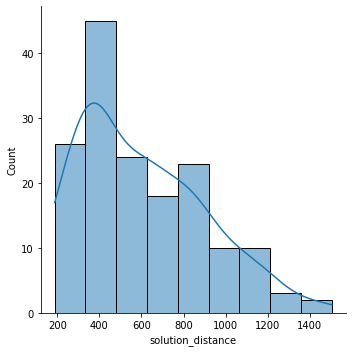

In [3]:
### Plot dependent variable

sns.displot(df['solution_distance'], kde=True)
plt.show()

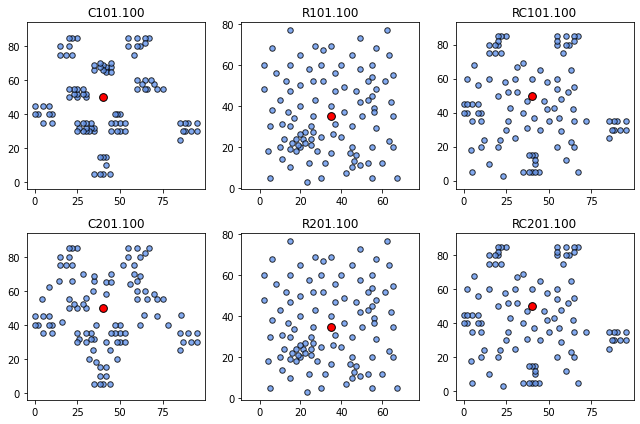

In [4]:
### Plot location distributions (equal for each group)

instances_ids = [0, 51, 120, 27, 87, 144]
df_plot = pd.DataFrame({'name' : df['name'][instances_ids],
                        'x' : [locs[1:,0] for locs in df['locations'][instances_ids]],
                        'y' : [locs[1:,1] for locs in df['locations'][instances_ids]], 
                        'depot': [locs[0] for locs in df['locations'][instances_ids]]})
df_plot.reset_index(inplace=True)

figsize=(9,6)
subplots=(2,3)
fig = plt.figure(figsize=figsize)
for i in range(df_plot.shape[0]):
    ax = fig.add_subplot(subplots[0],subplots[1],i+1)
    ax.scatter(df_plot.loc[i,'x'], df_plot.loc[i,'y'], c='cornflowerblue', s=30, alpha=0.8, ec='black')
    ax.scatter(df_plot.loc[i,'depot'][0], df_plot.loc[i,'depot'][1], c='red', s=60, alpha=1.0, ec='black')
    ax.axis('equal')
    ax.set_title(df_plot.loc[i,'name'])
plt.tight_layout()
plt.show()

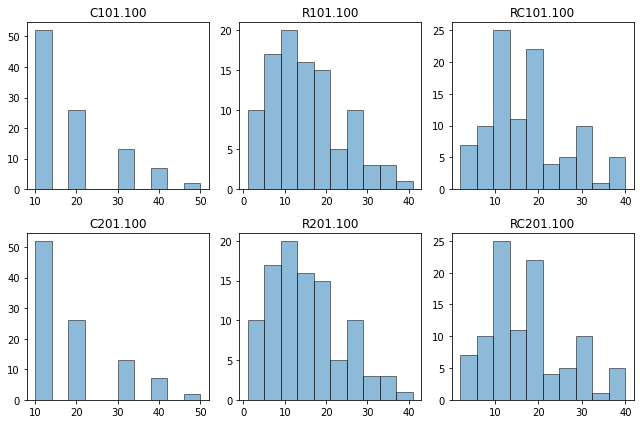

In [5]:
### plot demand distribution

instances_ids = [0, 51, 120, 27, 87, 144]
df_plot = pd.DataFrame({'name' : df['name'][instances_ids],
                        'dem' : [dems[1:] for dems in df['demands'][instances_ids]]})
df_plot.reset_index(inplace=True)

figsize=(9,6)
subplots=(2,3)
fig = plt.figure(figsize=figsize)
for i in range(df_plot.shape[0]):
    ax = fig.add_subplot(subplots[0],subplots[1],i+1)
    ax.hist(df_plot.loc[i,'dem'], alpha=0.5, ec='black')
    ax.set_title(df_plot.loc[i,'name'])
plt.tight_layout()
plt.show()

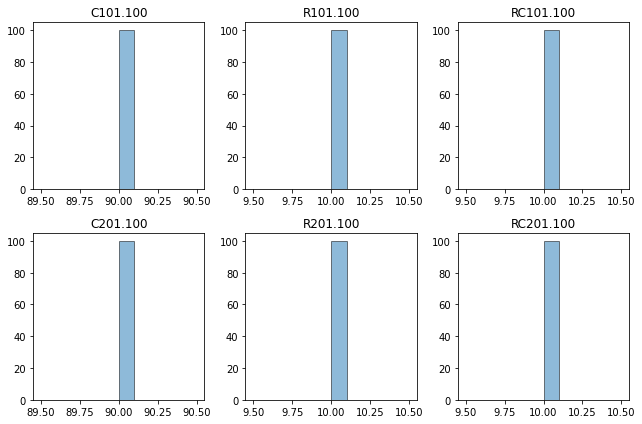

In [6]:
### plot service times distribution (equal per group)

instances_ids = [0, 51, 120, 27, 87, 144]
df_plot = pd.DataFrame({'name' : df['name'][instances_ids],
                        'st' : [st[1:] for st in df['service_times'][instances_ids]]})
df_plot.reset_index(inplace=True)

figsize=(9,6)
subplots=(2,3)
fig = plt.figure(figsize=figsize)
for i in range(df_plot.shape[0]):
    ax = fig.add_subplot(subplots[0],subplots[1],i+1)
    ax.hist(df_plot.loc[i,'st'], alpha=0.5, ec='black')
    ax.set_title(df_plot.loc[i,'name'])
plt.tight_layout()
plt.show()

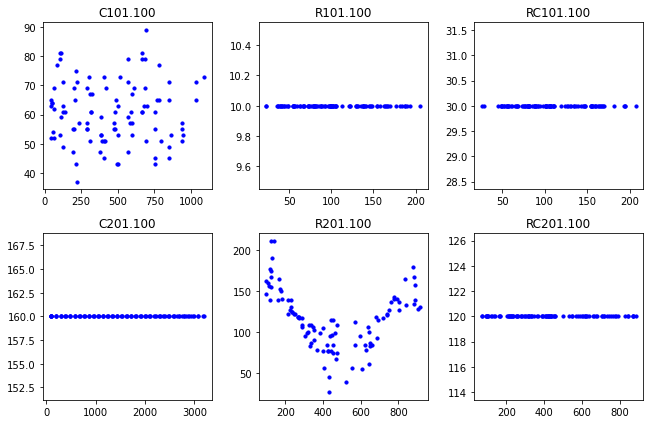

In [8]:
### plot time_window distribution

instances_ids = [0, 51, 120, 27, 87, 144]
df_plot = pd.DataFrame({
    'name' : df['name'][instances_ids],
    'tw_centers' : [(tw[:,0]+tw[:,1])/2 for tw in df['time_windows'][instances_ids]], 
    'tw_widths': [tw[:,1]-tw[:,0] for tw in df['time_windows'][instances_ids]]})
df_plot.reset_index(inplace=True, drop=True)

figsize=(9,6)
subplots=(2,3)
fig, axs = plt.subplots(2,3, figsize=figsize, facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()

for i in range(6):
    
    tw_centers = df_plot.loc[i, 'tw_centers']
    tw_widths = df_plot.loc[i, 'tw_widths']
    tw_width_depot = tw_widths[0]
    
    #axs[count].axis('equal')
    axs[i].scatter(tw_centers[tw_widths<tw_width_depot], tw_widths[tw_widths<tw_width_depot], s=10, c='blue')
    axs[i].set_title(df_plot.loc[i, 'name'])
    
plt.tight_layout()
plt.show()

### Gehring & Homberger

In [9]:
### Load Gehring & Homberger dataset (quick&dirty adaption from functions in routing.load)

path='data/benchmarks/gehring_homberger_instances/'

def load_homberger_instance(file, num_customers=200, path=path):
    """Load a single instance."""
    # Create an empty instance dictionary
    d = {'variant': 'cvrptw', 'locations': [], 'demands': [], 'time_windows': [], 'service_times': []}
    # Read the file and fill the instance dictionary
    with open (path+file+'.TXT', 'r') as f:
        for i, line in enumerate(f):
            row = line.split() # Split on any whitespace (including tabs)
            if i == 0: # get title
                d['name'] = str(row[0])+'.'+str(num_customers)
            elif i == 4: # get num_vehicles and capacities
                num_vehicles = int(row[0])
                d['vehicle_capacities'] = np.array([int(row[1])] * num_vehicles)
            elif i > 8 and i < 10 + num_customers: # get locations, time-windows, demands, service time
                d['locations'].append((int(row[1]), int(row[2])))
                d['demands'].append(int(row[3]))
                d['time_windows'].append((int(row[4]), int(row[5])))
                d['service_times'].append(int(row[6]))
    # Convert lists to arrays
    for k, v in d.items():
        if isinstance(v, list):
            d[k] = np.array(v)
    # Create and return instance
    instance = routing.routingInstance.fromdict(d)
    instance.compute_distance_matrix('euclidean')
    # instance.depot = 0
    return(instance)

df_list = []
for f in os.listdir(path):
    if f.endswith(".TXT"):
        filename = f[:-4]
        instance = load_homberger_instance(filename, num_customers=200, path=path)
        df_list.append(instance.__dict__)
df = pd.DataFrame(df_list)
print(df.shape)
df.head()

(60, 12)


,variant,locations,demands,time_windows,service_times,name,vehicle_capacities,depot,max_time,wait_time,distance_metric,distance_matrix
0,cvrptw,"[[70, 70], [33, 78], [59, 52], [10, 137], [4, ...","[0, 20, 20, 30, 10, 20, 10, 10, 40, 20, 20, 20...","[[0, 1351], [750, 809], [553, 602], [147, 219]...","[0, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90...",c1_2_1.200,"[200, 200, 200, 200, 200, 200, 200, 200, 200, ...",0,1351,1351,euclidean,"[[0.0, 37.85, 21.1, 89.94, 78.23, 62.94, 36.67..."
1,cvrptw,"[[70, 70], [33, 78], [59, 52], [10, 137], [4, ...","[0, 20, 20, 30, 10, 20, 10, 10, 40, 20, 20, 20...","[[0, 1351], [563, 997], [332, 822], [89, 743],...","[0, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90...",c1_2_10.200,"[200, 200, 200, 200, 200, 200, 200, 200, 200, ...",0,1351,1351,euclidean,"[[0.0, 37.85, 21.1, 89.94, 78.23, 62.94, 36.67..."
2,cvrptw,"[[70, 70], [33, 78], [59, 52], [10, 137], [4, ...","[0, 20, 20, 30, 10, 20, 10, 10, 40, 20, 20, 20...","[[0, 1351], [750, 809], [553, 602], [147, 219]...","[0, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90...",c1_2_2.200,"[200, 200, 200, 200, 200, 200, 200, 200, 200, ...",0,1351,1351,euclidean,"[[0.0, 37.85, 21.1, 89.94, 78.23, 62.94, 36.67..."
3,cvrptw,"[[70, 70], [33, 78], [59, 52], [10, 137], [4, ...","[0, 20, 20, 30, 10, 20, 10, 10, 40, 20, 20, 20...","[[0, 1351], [750, 809], [0, 1240], [147, 219],...","[0, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90...",c1_2_3.200,"[200, 200, 200, 200, 200, 200, 200, 200, 200, ...",0,1351,1351,euclidean,"[[0.0, 37.85, 21.1, 89.94, 78.23, 62.94, 36.67..."
4,cvrptw,"[[70, 70], [33, 78], [59, 52], [10, 137], [4, ...","[0, 20, 20, 30, 10, 20, 10, 10, 40, 20, 20, 20...","[[0, 1351], [750, 809], [0, 1240], [0, 1172], ...","[0, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90...",c1_2_4.200,"[200, 200, 200, 200, 200, 200, 200, 200, 200, ...",0,1351,1351,euclidean,"[[0.0, 37.85, 21.1, 89.94, 78.23, 62.94, 36.67..."


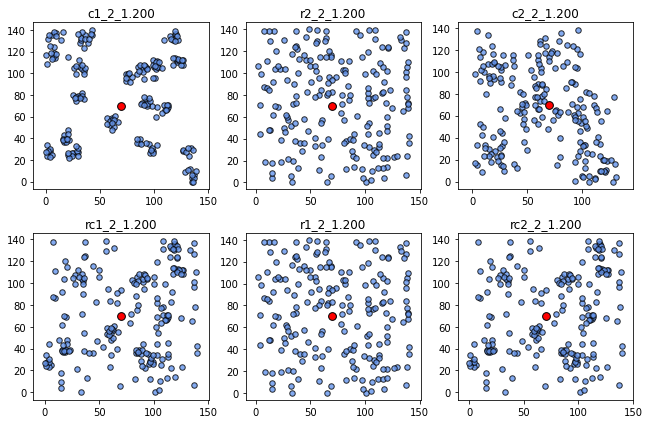

In [10]:
### Plot location distributions (equal for each group)

instances_ids = [0, 30, 10, 40, 20, 50]
df_plot = pd.DataFrame({'name' : df['name'][instances_ids],
                        'x' : [locs[1:,0] for locs in df['locations'][instances_ids]],
                        'y' : [locs[1:,1] for locs in df['locations'][instances_ids]], 
                        'depot': [locs[0] for locs in df['locations'][instances_ids]]})
df_plot.reset_index(inplace=True)

figsize=(9,6)
subplots=(2,3)
fig = plt.figure(figsize=figsize)
for i in range(df_plot.shape[0]):
    ax = fig.add_subplot(subplots[0],subplots[1],i+1)
    ax.scatter(df_plot.loc[i,'x'], df_plot.loc[i,'y'], c='cornflowerblue', s=30, alpha=0.8, ec='black')
    ax.scatter(df_plot.loc[i,'depot'][0], df_plot.loc[i,'depot'][1], c='red', s=60, alpha=1.0, ec='black')
    ax.axis('equal')
    ax.set_title(df_plot.loc[i,'name'])
plt.tight_layout()
plt.show()

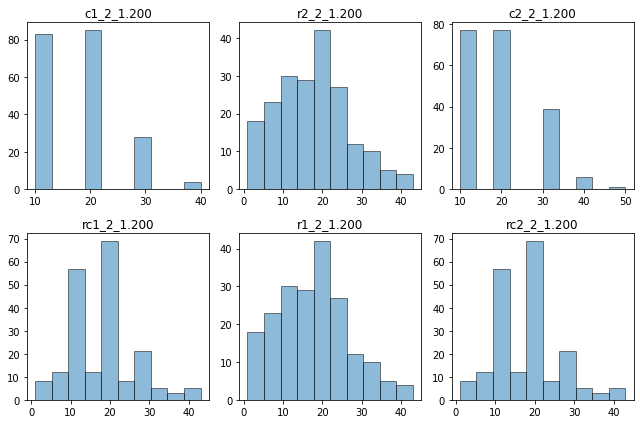

In [11]:
### plot demand distribution

instances_ids = [0, 30, 10, 40, 20, 50]
df_plot = pd.DataFrame({'name' : df['name'][instances_ids],
                        'dem' : [dems[1:] for dems in df['demands'][instances_ids]]})
df_plot.reset_index(inplace=True)

figsize=(9,6)
subplots=(2,3)
fig = plt.figure(figsize=figsize)
for i in range(df_plot.shape[0]):
    ax = fig.add_subplot(subplots[0],subplots[1],i+1)
    ax.hist(df_plot.loc[i,'dem'], alpha=0.5, ec='black')
    ax.set_title(df_plot.loc[i,'name'])
plt.tight_layout()
plt.show()

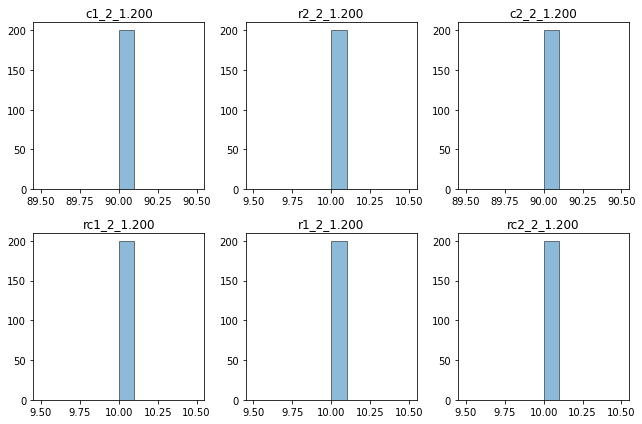

In [12]:
### plot service times distribution (equal per group)

instances_ids = [0, 30, 10, 40, 20, 50]
df_plot = pd.DataFrame({'name' : df['name'][instances_ids],
                        'st' : [st[1:] for st in df['service_times'][instances_ids]]})
df_plot.reset_index(inplace=True)

figsize=(9,6)
subplots=(2,3)
fig = plt.figure(figsize=figsize)
for i in range(df_plot.shape[0]):
    ax = fig.add_subplot(subplots[0],subplots[1],i+1)
    ax.hist(df_plot.loc[i,'st'], alpha=0.5, ec='black')
    ax.set_title(df_plot.loc[i,'name'])
plt.tight_layout()
plt.show()

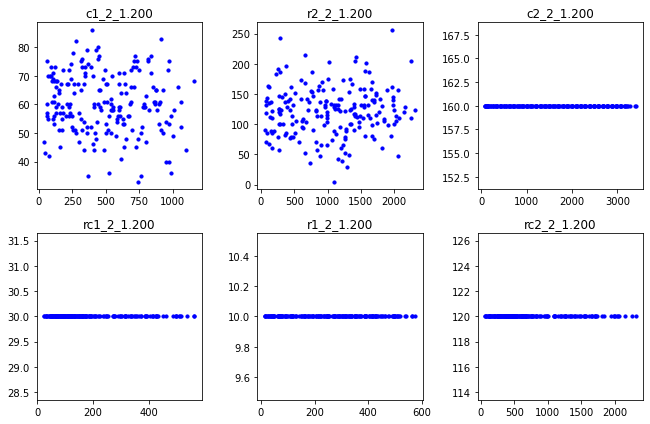

In [13]:
### plot time_window distribution

instances_ids = [0, 30, 10, 40, 20, 50]
df_plot = pd.DataFrame({
    'name' : df['name'][instances_ids],
    'tw_centers' : [(tw[:,0]+tw[:,1])/2 for tw in df['time_windows'][instances_ids]], 
    'tw_widths': [tw[:,1]-tw[:,0] for tw in df['time_windows'][instances_ids]]})
df_plot.reset_index(inplace=True, drop=True)

figsize=(9,6)
subplots=(2,3)
fig, axs = plt.subplots(2,3, figsize=figsize, facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()

for i in range(6):
    
    tw_centers = df_plot.loc[i, 'tw_centers']
    tw_widths = df_plot.loc[i, 'tw_widths']
    tw_width_depot = tw_widths[0]
    
    #axs[count].axis('equal')
    axs[i].scatter(tw_centers[tw_widths<tw_width_depot], tw_widths[tw_widths<tw_width_depot], s=10, c='blue')
    axs[i].set_title(df_plot.loc[i, 'name'])
    
plt.tight_layout()
plt.show()